In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import time

<h2>Question 1</h2>
You are CEO of a clothing company with outlets in many cities. You have decided to open an outlet in a new city. To help with the decision of selecting a city, you decide to look at population vs profit data and apply linear regression to see if any relation exists between population & profit with population being the independent variable.<br><br>
(a) Apply Batch LMS, Stochastic LMS and Least Square closed form solution and compare the results. Plot the graphs of the obtained results and training data. Use the learning rate of 0.1. Analyze the results. (Convergence time, accuracy etc.)(Don’t use in-built packages.)<br><br>

In [2]:
df = pd.read_excel('q1.xlsx')

In [3]:
df.columns
X = df["Population in 10,000\'s"]
y = df["Profit In Lakhs(Rs)"]

\begin{align}
\theta  =  (X^T X)^{-1}X^T Y
\end{align}

In [4]:
# Closed Form Solution
X_T = X.T

#Calculating run time
start = time.time()

#inverse of 1x1 matrix is the reciprocal of the element
theta = (1/np.dot(X.T,X))*np.dot(X.T,y)

end = time.time()

print(f"Runtime of the program is {end - start}")

y_predicted = (theta.T)*X
print(r2_score(y,y_predicted))
print(theta)

Runtime of the program is 0.0015101432800292969
0.6109951146279908
0.8036367958297592


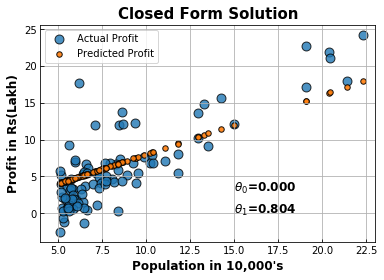

In [5]:
#PLOTTING RESULTS OBTAINED FROM CLOSED FORM SOLUTION

plt.scatter(X,y,label='Actual Profit',s=80,ec='k',alpha=0.8)
plt.scatter(X,y_predicted,label='Predicted Profit',s=30,ec='k',alpha=0.9)
plt.title('Closed Form Solution',{'color':'black', 'fontweight':1000,'fontsize':15})
plt.ylabel('Profit in Rs(Lakh)',{'color':'black', 'fontweight':1000,'fontsize':12})
plt.xlabel("Population in 10,000's",{'color':'black', 'fontweight':1000,'fontsize':12})
plt.xlim([4,23])
plt.tick_params(direction='in',which='both')
theta_1 = theta
theta_0 = 0
plt.text(15,0,r'$\theta_1$=%0.3f'%theta_1,{'color':'black', 'fontweight':1000,'fontsize':12})
plt.text(15,3,r'$\theta_0$=%0.3f'%theta_0,{'color':'black', 'fontweight':1000,'fontsize':12})
plt.grid()
plt.legend()
plt.savefig('1_ClosedForm.png',dpi=300)
plt.show()

<h2>Function for computing cost

In [16]:
def mycomputecost(X,y,theta_0,theta_1):
    m = len(y)
    J = 0
    prediction = theta_0*np.ones(len(y)).T + theta_1*X
    sqerr = ((prediction - y)**2).sum(axis=0);
    J = 1/(2*m)*sqerr
    return J

[-3.41141118] [1.17273299]
Runtime of the program is 0.24655485153198242
[-3.42313374] [1.14400427]
0.7005941322373321


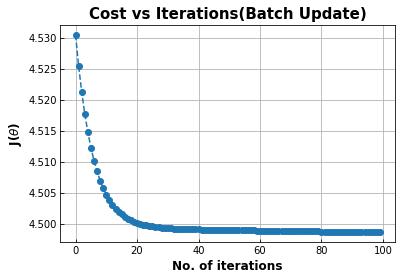

In [45]:
#B A T C H    U P D A T E
alpha = 0.001
m =  len(y)#(X.shape)
# theta_0 = np.random.rand(1)
# theta_1 = np.random.rand(1)

# For reproducibility
theta_0 = np.array([-3.41141118])
theta_1 = np.array([1.17273299])
# 0.701785171584153
print(theta_0,theta_1)
count = 0
start=time.time()
cost_batch = []
while count < 100:
    temp_theta_0 = theta_0 - alpha*(1/m)*(((((theta_0*np.ones(len(y))).T) + (theta_1*X) - y)).sum(axis=0))
    temp_theta_1 = theta_1 - alpha*(1/m)*((np.dot((((theta_0*np.ones(len(y))).T) + (theta_1*X) - y),X)).sum(axis=0))
    theta_0 = temp_theta_0
    theta_1 = temp_theta_1
    count = count+1
    y_pred_gd = theta_0*np.ones(len(y)).T + theta_1*X
    cost_batch.append(mycomputecost(X,y,theta_0,theta_1))
end=time.time()
print(f"Runtime of the program is {end - start}")
print(theta_0,theta_1)
print(r2_score(y,y_pred_gd))

plt.plot(cost_batch,'--o')
plt.title('Cost vs Iterations(Batch Update)',{'color':'black', 'fontweight':1000,'fontsize':15})
plt.ylabel(r'J($\theta$)',{'color':'black', 'fontweight':1000,'fontsize':12})
plt.xlabel("No. of iterations",{'color':'black', 'fontweight':1000,'fontsize':12})
plt.tick_params(direction='in',which='both')
plt.grid()
plt.savefig('cost_batch.png',dpi=300)
plt.show()

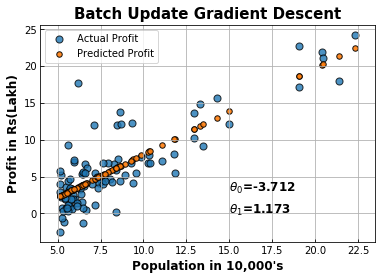

In [678]:
#PLOTTING RESULTS OBTAINED FROM BATCH UPDATE

y_predicted = theta_0 + theta_1*X
plt.scatter(X,y,label='Actual Profit',s=50,ec='k',alpha=0.8)
plt.scatter(X,y_predicted,label='Predicted Profit',s=30,ec='k',alpha=0.9)
plt.title('Batch Update Gradient Descent',{'color':'black', 'fontweight':1000,'fontsize':15})
plt.ylabel('Profit in Rs(Lakh)',{'color':'black', 'fontweight':1000,'fontsize':12})
plt.xlabel("Population in 10,000's",{'color':'black', 'fontweight':1000,'fontsize':12})
plt.xlim([4,23.5])
plt.tick_params(direction='in',which='both')
plt.text(15,0,r'$\theta_1$=%0.3f'%theta_1,{'color':'black', 'fontweight':1000,'fontsize':12})
plt.text(15,3,r'$\theta_0$=%0.3f'%theta_0,{'color':'black', 'fontweight':1000,'fontsize':12})
plt.grid()
plt.legend()
plt.savefig('1_BatchUpdate_GD.png',dpi=300)
plt.show()


In [50]:
# S T O C H A S T I C   U P D A T E
X = df["Population in 10,000\'s"]
y = df["Profit In Lakhs(Rs)"]
theta_0 = np.random.rand(1)
theta_1 = np.random.rand(1)
theta_ori = np.array([theta_0,theta_1])
# theta_0 = np.array([-3.66451783])
# theta_1 = np.array([1.24425])
cost_stoch = []
alpha = 0.001
temp_theta_0 = theta_0
temp_theta_1 = theta_1
print(theta_0,theta_1)
start=time.time() 
seed = np.random.randint(10000,99999,200)
t0 = [] 
t1 = []
scr= []
for i in range(len(seed)):
    if seed[i]%2 != 0:
        seed[i] = seed[i] + 1
X = X.to_numpy(X)
y = y.to_numpy(y)
for s in seed:
    df = pd.read_excel('q1.xlsx')
    X = df["Population in 10,000\'s"]
    y = df["Profit In Lakhs(Rs)"]
    X = X.to_numpy(X)
    y = y.to_numpy(y)
    np.random.seed(s)
    np.random.shuffle(X)
    np.random.seed(s)
    np.random.shuffle(y)
    for i in range(len(X)):
        temp_theta_0 = theta_0 + alpha*(y[i] - theta_0 - theta_1*X[i])
        temp_theta_1 = theta_1 + alpha*((y[i] - theta_0 - theta_1*X[i])*X[i])
        theta_0 = temp_theta_0
        theta_1 = temp_theta_1
    y_predict = theta_0 + theta_1*X
    t0.append(theta_0)
    t1.append(theta_1)
    scr.append(r2_score(y,y_predict))
    
end=time.time()
print(f"Runtime of the program is {end - start}")
print(max(scr))
print(t0[scr.index(max(scr))],t1[scr.index(max(scr))],seed[scr.index(max(scr))],scr.index(max(scr)))
theta_0=t0[scr.index(max(scr))]
theta_1=t1[scr.index(max(scr))]
print(theta_0,theta_1)

[0.19108847] [0.58765343]
Runtime of the program is 2.130195379257202
0.7017932199037651
[-3.72275102] [1.17130781] 66100 164
[-3.72275102] [1.17130781]


Runtime of the program is 0.00957798957824707
[-0.00475752] [0.87033797]


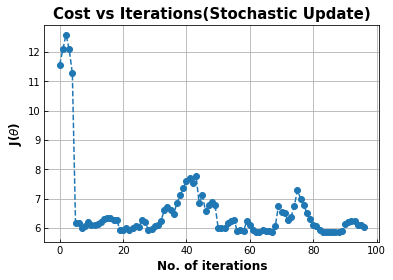

In [62]:
cost_stoch = []
s = seed[scr.index(max(scr))]
theta_0 = np.array([0])
theta_1 = np.array([0])
df = pd.read_excel('q1.xlsx')
X = df["Population in 10,000\'s"]
y = df["Profit In Lakhs(Rs)"]
X = X.to_numpy(X)
y = y.to_numpy(y)
np.random.seed(s)
np.random.shuffle(X)
np.random.seed(s)
np.random.shuffle(y)
start = time.time()
for i in range(len(X)):
    temp_theta_0 = theta_0 + alpha*(y[i] - theta_0 - theta_1*X[i])
    temp_theta_1 = theta_1 + alpha*((y[i] - theta_0 - theta_1*X[i])*X[i])
    theta_0 = temp_theta_0
    theta_1 = temp_theta_1
    cost_stoch.append(mycomputecost(X,y,theta_0,theta_1))
end = time.time()
y_predict = theta_0 + theta_1*X

print(f"Runtime of the program is {end - start}")
print(theta_0,theta_1)
# print(r2_score(y_pred_gd,y))

plt.plot(cost_stoch,'--o')
plt.title('Cost vs Iterations(Stochastic Update)',{'color':'black', 'fontweight':1000,'fontsize':15})
plt.ylabel(r'J($\theta$)',{'color':'black', 'fontweight':1000,'fontsize':12})
plt.xlabel("No. of iterations",{'color':'black', 'fontweight':1000,'fontsize':12})
plt.tick_params(direction='in',which='both')
plt.grid()
plt.savefig('cost_stoch.png',dpi=300)
plt.show()

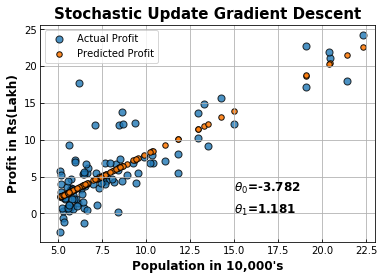

In [680]:
#PLOTTING RESULTS OBTAINED FROM STOCHASTIC UPDATE
y_predicted = theta_0 + theta_1*X
plt.scatter(X,y,label='Actual Profit',s=50,ec='k',alpha=0.8)
plt.scatter(X,y_predicted,label='Predicted Profit',s=30,ec='k',alpha=0.9)
plt.title('Stochastic Update Gradient Descent',{'color':'black', 'fontweight':1000,'fontsize':15})
plt.ylabel('Profit in Rs(Lakh)',{'color':'black', 'fontweight':1000,'fontsize':12})
plt.xlabel("Population in 10,000's",{'color':'black', 'fontweight':1000,'fontsize':12})
plt.xlim([4,23])
plt.tick_params(direction='in',which='both')
plt.text(15,0,r'$\theta_1$=%0.3f'%theta_1,{'color':'black', 'fontweight':1000,'fontsize':12})
plt.text(15,3,r'$\theta_0$=%0.3f'%theta_0,{'color':'black', 'fontweight':1000,'fontsize':12})
plt.grid()
plt.legend()
plt.savefig('1_StochasticUpdate_GD.png',dpi=300)
plt.show()


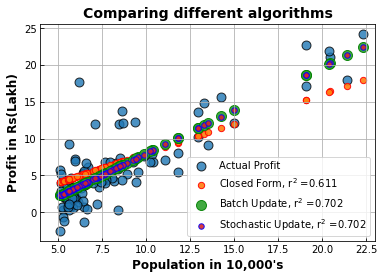

In [681]:
#COMPARING ALL METHODS

theta_0s = np.array([0,-3.74440645,-3.73206943])
theta_1s = np.array([0.8036367958297591,1.17602172,1.17311248])
scores   = np.array([0.610995114627991,0.7018585338387632,0.7018302851371887])
y_predicted_0 = theta_0s[0]*(np.ones(97).T) + theta_1s[0]*X
y_predicted_1 = theta_0s[1]*(np.ones(97).T) + theta_1s[1]*X
y_predicted_2 = theta_0s[2]*(np.ones(97).T) + theta_1s[2]*X
# fig= plt.figure(figsize=(10,10))
plt.grid()
plt.scatter(X,y,label='Actual Profit',s=80,ec='k',alpha=0.8)
plt.scatter(X,y_predicted_0,label='Closed Form, r$^2$ =%0.3f'%scores[0],s=40,ec='r',alpha=0.9)
plt.scatter(X,y_predicted_1,label='Batch Update, r$^2$ =%0.3f'%scores[1],s=100,ec='g',alpha=0.9)
plt.scatter(X,y_predicted_2,label='Stochastic Update, r$^2$ =%0.3f'%scores[2],s=30,ec='b',alpha=0.9)
plt.title('Comparing different algorithms',{'fontweight':1000,'fontsize':14})
plt.ylabel('Profit in Rs(Lakh)',{'fontweight':1000,'fontsize':12})
plt.xlabel("Population in 10,000's",{'fontweight':1000,'fontsize':12})
plt.xlim([4,23])
plt.tick_params(direction='in',which='both')
# plt.text(15,0,r'$\theta_1$=%0.3f'%theta_1,{'color':'black', 'fontweight':1000,'fontsize':12})
# plt.text(15,3,r'$\theta_0$=%0.3f'%theta_0,{'color':'black', 'fontweight':1000,'fontsize':12})
plt.legend(loc='lower right')
plt.savefig('1_comparison_GD.png',dpi=300)
plt.show()

<H3> Locally weighted linear regression

(b) Manually perform the locally weighted least linear regression using the first four data points given in excel sheet. Query point is 7.576 and bandwidth parameter is 0.5. Perform four iterations by using stochastic LMS.
<p>Note: Data for the question one is provided in the excel file “q1.xlsx”. Negative values in the profit column mean a loss.

In [412]:
df = pd.read_excel('q1.xlsx')
X = df["Population in 10,000\'s"][0:4]
y = df["Profit In Lakhs(Rs)"][0:4]

In [413]:
query = 7.576
bw = 0.5


In [417]:
w = np.exp(-((X-query*(np.ones(4)).T)**2)/(2*bw**2))
print(w)

0    0.023960
1    0.000505
2    0.113718
3    0.639493
Name: Population in 10,000's, dtype: float64


In [420]:
theta_0 = np.random.rand(1)
# theta_0 = 5.96
# theta_1 = 0.0704
# theta_0 = theta_0 + np.dot(w,(y - theta_0*X)**2)
theta_1 = np.random.rand(1)
alpha = 0.1
print("theta_0 in start = %0.3f"%theta_0)
print("theta_1 in start = %0.3f"%theta_1)
for i in range(len(y)):
    temp_theta_0 = theta_0 + alpha*w[i]*(y[i] - theta_0 - theta_1*X[i])**2
    temp_theta_1 = theta_1 + alpha*w[i]*(y[i] - theta_0 - theta_1*X[i])**2
    theta_0 = temp_theta_0
    theta_1 = temp_theta_1
    print(theta_0,theta_1)
print("final theta_0 = %0.3f"%theta_0)
print("final theta_1 = %0.3f"%theta_1)
y_p = theta_0*np.ones(4).T + theta_1*X
print(y_p,y)
print("result = ",theta_0 + theta_1*query)

theta_0 in start = 0.380
theta_1 in start = 0.948
[0.6926433] [1.26105347]
[0.69274804] [1.26115821]
[0.74777946] [1.31618963]
[0.96832016] [1.53673032]
final theta_0 = 0.968
final theta_1 = 1.537
0    10.511569
1     9.616577
2    14.212784
3    11.884023
Name: Population in 10,000's, dtype: float64 0    17.6920
1     9.2302
2    13.7620
3    11.9540
Name: Profit In Lakhs(Rs), dtype: float64
result =  [12.6105891]


(c) Compare the results of Elastic net, Lasso and Ridge regression.(Use in-built packages)

<h2>ElasticNet

In [257]:
score3 = []
from sklearn.linear_model import ElasticNet
df = pd.read_excel('q1.xlsx')
df = pd.DataFrame.to_numpy(df)
df.reshape(-1,1)
X = df[:,0]
y = df[:,-1]
X = X[:,np.newaxis]
reg_EN = ElasticNet()
reg_EN.fit(X,y)
print(reg_EN.coef_)
print(reg_EN.intercept_)
print(r2_score(y,reg_EN.predict(X)))
score3.append(r2_score(y,reg_EN.predict(X)))

[1.12146695]
-3.323957621615442
0.6995053218364957


<h2>Lasso

In [258]:
from sklearn.linear_model import Lasso
df = pd.read_excel('q1.xlsx')
df = pd.DataFrame.to_numpy(df)
df.reshape(-1,1)
X = df[:,0]
y = df[:,-1]
X = X[:,np.newaxis]
reg_La = Lasso()
reg_La.fit(X,y)
print(reg_La.coef_)
print(reg_La.intercept_)
print(r2_score(y,reg_La.predict(X)))
score3.append(r2_score(y,reg_La.predict(X)))

[1.12556458]
-3.3578032325506904
0.6997863246152711


<h2>Ridge Regression

In [259]:
from sklearn.linear_model import Ridge
df = pd.read_excel('q1.xlsx')
df = pd.DataFrame.to_numpy(df)
df.reshape(-1,1)
X = df[:,0]
y = df[:,-1]
X = X[:,np.newaxis]
reg_Rid = Ridge()
reg_Rid.fit(X,y)
print(reg_Rid.coef_)
print(reg_Rid.intercept_)
print(r2_score(y,reg_Rid.predict(X)))
score3.append(r2_score(y,reg_Rid.predict(X)))

[1.1922044]
-3.908234831689251
0.7020312146131911


<h3>Comparing Lasso, Ridge and Elastic Net

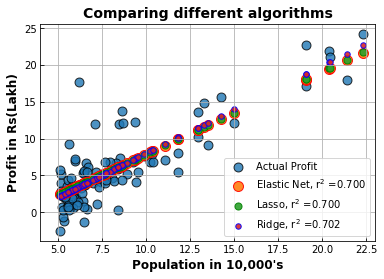

In [264]:
plt.grid()
plt.scatter(X,y,label='Actual Profit',s=80,ec='k',alpha=0.8)
plt.scatter(X,reg_EN.predict(X),label='Elastic Net, r$^2$ =%0.3f'%score3[0],s=100,ec='r',alpha=0.9)
plt.scatter(X,reg_La.predict(X),label='Lasso, r$^2$ =%0.3f'%score3[1],s=50,ec='g',alpha=0.9)
plt.scatter(X,reg_Rid.predict(X),label='Ridge, r$^2$ =%0.3f'%score3[2],s=30,ec='b',alpha=0.9)
plt.title('Comparing different algorithms',{'fontweight':1000,'fontsize':14})
plt.ylabel('Profit in Rs(Lakh)',{'fontweight':1000,'fontsize':12})
plt.xlabel("Population in 10,000's",{'fontweight':1000,'fontsize':12})
plt.xlim([4,23])
plt.tick_params(direction='in',which='both')
# plt.text(15,0,r'$\theta_1$=%0.3f'%theta_1,{'color':'black', 'fontweight':1000,'fontsize':12})
# plt.text(15,3,r'$\theta_0$=%0.3f'%theta_0,{'color':'black', 'fontweight':1000,'fontsize':12})
plt.legend(loc='lower right')
plt.savefig('1_comparison_all.png',dpi=300)
plt.show()

<h2>Question 2</h2>
A university conducts 2 exams – Aptitude & Verbal as its entrance test to a 2-year program. Based on the scores of these 2 papers, admission is given to students. University has not mentioned the exact criteria of selection. Based on historical data, you need to predict whether a student will get admission based on his/her scores in the 2 exams. Data is provided in q2train.csv & q2test.csv. Train.csv contains training data. First column contains the score of Aptitude exam, 2nd column contains the score of verbal exam and 3rd column indicates whether that student got admission or not. 0 indicates not selected whereas 1 means selected. q2test.csv contains test data.
<p>(a) Apply logistic regression on training data with the first 2 columns as input data and the third column as output. Use any suitable learning rate. Now predict admission results on test data (q2test.csv) and print the result in output1.txt with every line of the text file containing either 0 or 1. Plot the results. <p>(Don’t use in-built packages.)

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [266]:
df_train = pd.read_excel('q2train.xlsx')
df_test  = pd.read_excel('q2test.xlsx')

<h2>Visulaising the training dataset

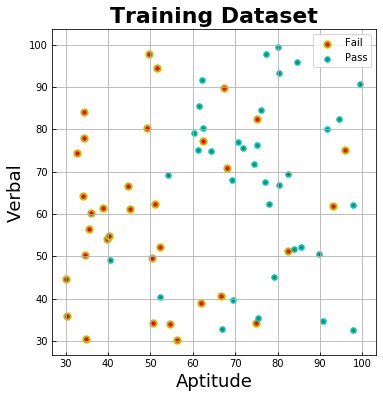

In [424]:
from matplotlib import pyplot as plt
from pandas import DataFrame 
df_train = pd.read_excel('q2train.xlsx')
X = df_train[df_train.columns[0:-1]]
Y = df_train[df_train.columns[-1]]
X = X.to_numpy()
Y = Y.to_numpy()
font = {'fontweight':600,'fontsize':22}   #for title
fon  = {'fontweight':500,'fontsize':18}   #for labels
fontl  = {'fontweight':500,'fontsize':12} #for text

df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'red', 1:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    if key == 0:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label='Fail', color=colors[key],s=40,ec='y',lw=2)
    if key == 1:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label='Pass', color=colors[key],s=20,ec='c',lw=2)
        
plt.xlabel('Aptitude',fon)
plt.ylabel('Verbal',fon)
plt.title('Training Dataset',font)
plt.tick_params(direction='in',which='both')
plt.gca().set_aspect('equal','box')
plt.grid()
plt.legend()
fig = plt.gcf()
fig.set_size_inches(6,6)
fig.savefig('2_Training.png',dpi=300,facecolor='w', edgecolor='k', bbox_inches='tight')
plt.show()

<h2>Logistic Regression

<h3>Funtion for calculating accuracy of logistic regression model

In [425]:
def myscore(y,y_predicted):
    sahi = 0
    for i in range(len(y)):
        if y[i] == np.int(np.rint(y_pred_logreg[i])):
            sahi += 1
    accuracy = sahi/len(y)
#     print(accuracy)
    return accuracy

<h3>Hypothesis function

In [426]:
theta = (np.random.rand(3))
print(theta)
def hypothesis(X,theta):
    h = 1/(1 + np.exp(-np.dot(X,theta.T)))
    return(h)

[0.33059586 0.69931009 0.6189639 ]


<h3>Training Logistic Regression model

In [427]:
theta = np.array([-6.3278 ,0.0840,0.0158])
alpha = 0.000001
# seed = np.random.randint(10000,99999,50)
t0 = [] 
t1 = []
t2 = []
scr= []

df = pd.read_excel('q2train.xlsx')
X = df[df.columns[0:-1]]
y = df[df.columns[-1]]
X['ones'] = np.ones(len(y))
cols = X.columns.to_list()
cols = cols[-1:] + cols[:-1]
X = X[cols]

X = X.to_numpy()
y = y.to_numpy()

# print(hypothesis(X,theta.T))

for i in range(len(y)):
    h = hypothesis(X,theta)
    temp_theta_0 = theta[0] + alpha*(y[i] - hypothesis(X[i],theta))
    temp_theta_1 = theta[1] + alpha*(y[i] - hypothesis(X[i],theta))*X[i][1]
    temp_theta_2 = theta[2] + alpha*(y[i] - hypothesis(X[i],theta))*X[i][2]
    theta = np.array([temp_theta_0,temp_theta_1,temp_theta_2])
y_pred_logreg = hypothesis(X,theta)
t0.append(theta[0])
t1.append(theta[1])
t2.append(theta[2])
scr.append(myscore(y,y_pred_logreg))
end=time.time()
print(f"Runtime of the program is {end - start}")
print(max(scr))
print(t0[scr.index(max(scr))],t1[scr.index(max(scr))],t2[scr.index(max(scr))],seed[scr.index(max(scr))],scr.index(max(scr)))
theta[0]=t0[scr.index(max(scr))]
theta[1]=t1[scr.index(max(scr))]
theta[2]=t2[scr.index(max(scr))]
print(theta)

y_pred_logreg = hypothesis(X,theta)
# y_pred_logreg = y_pred_logreg.astype(int)
print(myscore(y,y_pred_logreg))

Runtime of the program is 10714.187948942184
0.8142857142857143
-6.327799506254954 0.0840320291426886 0.015834170383155162 61138 0
[-6.32779951  0.08403203  0.01583417]
0.8142857142857143


In [428]:
y_pred_logreg = hypothesis(X,theta)
# print(y_pred_logreg)
y_pred_logreg = np.rint(y_pred_logreg)
yy = y_pred_logreg.astype(int)
print(yy)

[0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0]


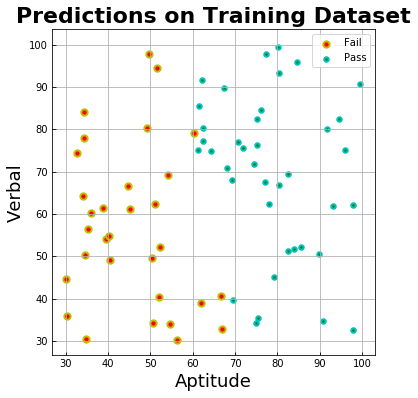

In [429]:
df = DataFrame(dict(x=X[:,1], y=X[:,2], label=yy))
colors = {0:'red', 1:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    if key == 0:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label='Fail', color=colors[key],s=40,ec='y',lw=2)
    if key == 1:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label='Pass', color=colors[key],s=20,ec='c',lw=2)
        
plt.xlabel('Aptitude',fon)
plt.ylabel('Verbal',fon)
plt.title('Predictions on Training Dataset',font)
plt.tick_params(direction='in',which='both')
plt.gca().set_aspect('equal','box')
plt.grid()
plt.legend()
fig = plt.gcf()
fig.set_size_inches(6,6)
fig.savefig('2_Predict_Train.png',dpi=300,facecolor='w', edgecolor='k', bbox_inches='tight')
plt.show()

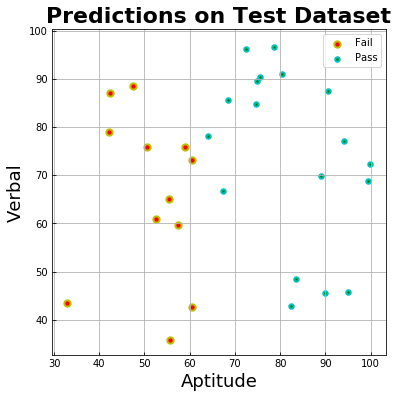

In [431]:
from matplotlib import pyplot as plt
from pandas import DataFrame 
df_test = pd.read_excel('q2test.xlsx')

X = df_test[df_test.columns[:]]
X['ones'] = np.ones(len(X))
cols = X.columns.to_list()
cols = cols[-1:] + cols[:-1]
X = X[cols]
X = X.to_numpy()
Y = hypothesis(X,theta)
Y = np.rint(Y)
Y = Y.astype(int)

font = {'fontweight':600,'fontsize':22}   #for title
fon  = {'fontweight':500,'fontsize':18}   #for labels
fontl  = {'fontweight':500,'fontsize':12} #for text

df = DataFrame(dict(x=X[:,1], y=X[:,2], label=Y))
colors = {0:'red', 1:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    if key == 0:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label='Fail', color=colors[key],s=40,ec='y',lw=2)
    if key == 1:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label='Pass', color=colors[key],s=20,ec='c',lw=2)
        
plt.xlabel('Aptitude',fon)
plt.ylabel('Verbal',fon)
plt.title('Predictions on Test Dataset',font)
plt.tick_params(direction='in',which='both')
# plt.gca().set_aspect('equal','box')
plt.grid()
plt.legend()
fig = plt.gcf()
fig.set_size_inches(6,6)
fig.savefig('2_Predict_Test.png',dpi=300,facecolor='w', edgecolor='k', bbox_inches='tight')
plt.show()

In [410]:
print(Y)

[0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1]
